In [1]:
from superfv import AdvectionSolver, initial_conditions
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def passive_square(x, y, z):
    xc, yc = x - 0.5, y - 0.75
    return np.where(
        (np.abs(xc) < 0.15) & (np.abs(yc) < 0.15),
        1.0,
        0.0,
    )


solver = AdvectionSolver(
    ic=initial_conditions.slotted_disk,
    ic_passives={"passive_square": passive_square},
    bcx="ic",
    bcy="ic",
    nx=64,
    ny=64,
    nz=1,
    p=3,
    interpolation_scheme="transverse",
    MOOD=True,
)

solver.run([np.pi, 2 * np.pi])

100%|██████████| 6.283185307179586/6.283185307179586 [00:12]   


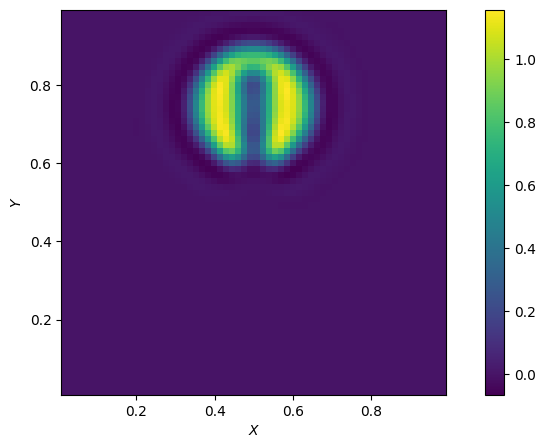

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
solver.plot_2d_slice(ax, "rho", x=None, y=None)
# add colorbar
ax.figure.colorbar(ax.images[0], ax=ax)

In [4]:
print(solver.timer.report())

Category                                              Calls      Cumulative Time
----------------------------------------------------------------------------------
!FiniteVolumeSolver.run                                   1                12.65
AdvectionSolver.advection_upwind                       3968                 0.56
AdvectionSolver.compute_dt_and_fluxes                  1984                11.31
AdvectionSolver.get_dt                                 1984                 0.17
AdvectionSolver.minisnapshot                            497                 0.03
ExplicitODESolver.integrate                               1                12.65
ExplicitODESolver.integrate.body                          1                12.62
ExplicitODESolver.minisnapshot                          497                 0.00
FiniteVolumeSolver.MOOD_loop                           1984                 0.49
FiniteVolumeSolver.apply_bc                            1987                 6.73
FiniteVolumeSolver.compute